In [ ]:
#  Building a model to Predict Customer Churn(no, yes)
#  based on logisticRegression method

In [37]:
# import statement
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [2]:
# load and read the data

data = pd.read_csv("customer_churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# preliminary data exploration

In [4]:
data.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.shape

(7043, 21)

In [7]:
# check for missing value
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.duplicated().any()

False

In [9]:
# there is no NAN and duplicted values

In [10]:
# let's get some descriptive statistics for quantitative data columns

data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
# Customer churn count(total No, total Yes)

data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

C:\Users\Kempsly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

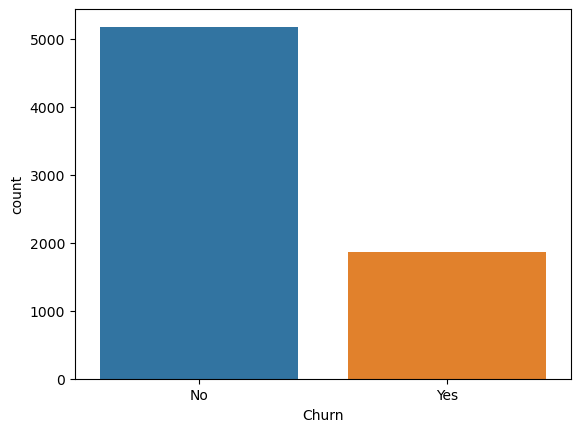

In [13]:
# let's visualize the repartition of customer churn count with seaborn

sns.countplot(data['Churn'])



In [18]:
# Let's see the percentage of customers that are leaving
# and the percentage of remaining customers

numRetained = data[data.Churn == 'No'].shape[0]
numChurned = data[data.Churn == 'Yes'].shape[0]

# print the percentage of customers that stayed
print(round(numRetained/(numRetained + numChurned) * 100, 2),'% of customers stayed in the company')
# peint the percentage of customers that left
print(round(numChurned/(numRetained + numChurned) * 100, 2), '% of customers left the company')



73.46 % of customers stayed in the company
26.54 % of customers left with the company


<AxesSubplot:xlabel='gender', ylabel='count'>

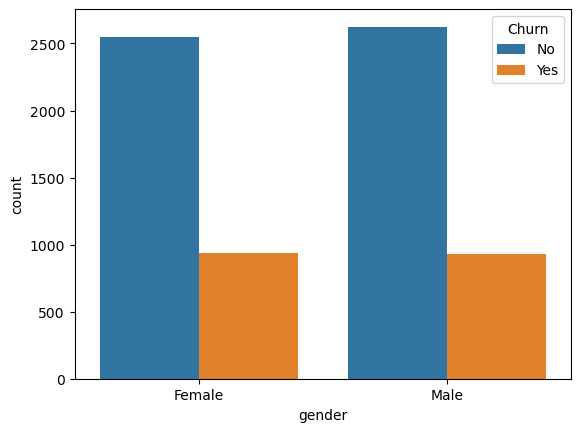

In [19]:
# Churn count per gender

sns.countplot(x ='gender', hue='Churn', data=data)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

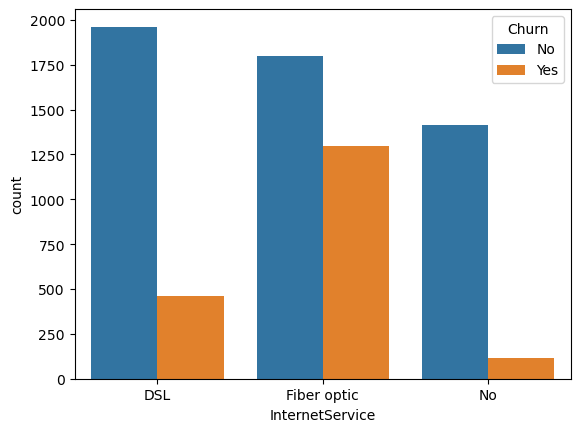

In [20]:
# churn count for the internet service

sns.countplot(x='InternetService', hue='Churn', data=data)

In [45]:
# visualisation for our quantitive data
# numericFeatures = ['tenure', 'MonthlyCharges']
# fig, ax = plt.subplots(1,2, figsize=(28, 8))
# data[data.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
# data[data.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)

In [22]:
# for our analysis we won't neeed customerID column, let's just remove it

clean_data = data.drop('customerID', axis=1)

In [25]:
# we should convert all non numeric data into numerical
# we can't deal with categorical data
for column in clean_data.columns:
  if clean_data[column].dtype == np.number:
    continue
  clean_data[column] = LabelEncoder().fit_transform(clean_data[column])

C:\Users\Kempsly\AppData\Local\Temp\ipykernel_17844\554628476.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if clean_data[column].dtype == np.number:


In [26]:
clean_data.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [28]:
clean_data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,2609,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,2646,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3022,0


In [30]:
# scaling  data for training


x = clean_data.drop('Churn', axis=1)
y = clean_data['Churn']
x = StandardScaler().fit_transform(x)

In [31]:
# our data is divided into 80% for training and 20% for testing

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [32]:
# creating the model
model = LogisticRegression()

In [33]:
# Train the model
model.fit(xtrain, ytrain)

LogisticRegression()

In [34]:
# prediction based on the test data

predictions = model.predict(xtest)


In [35]:
# output the prediction

print(predictions)

[1 0 0 ... 0 0 0]


In [36]:
# 

print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [44]:
# accuracy of the model
model.score(xtest,  ytest)

0.8161816891412349

<AxesSubplot:>

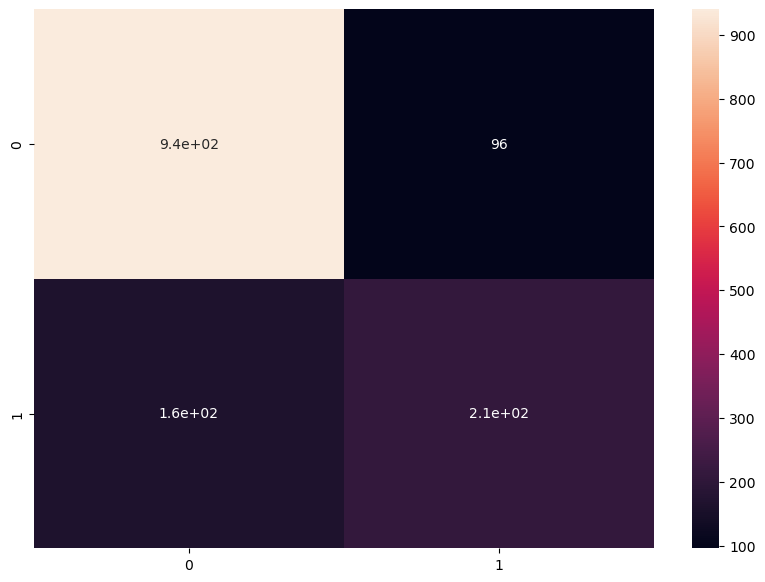

In [43]:
cm= confusion_matrix(ytest, predictions)
plt.figure(figsize = (10,7))
plt.xlabel('Predicted')
plt.ylabel('Truth')
sns.heatmap(cm, annot=True)